In [1]:
import pandas as pd
from train_test import *
from load_data import *

### Train Models

In [ ]:
# Load in the training data
train_data = preprocess_data("twitter_training.csv")

# Create the tweet corpus
train_corpus = load_train_corpus(train_data)

# Train the model (depending on which model type: CNN, RNN, or LSTM)
rnn_results = train_model(model_type = "LSTM", train_data = train_data, train_corpus = train_corpus, epochs = 15)

# Save results
rnn_results.to_csv("results/lstm_outputs.csv")

### Test Models

In [8]:
# Load in the training data
train_data = preprocess_data("twitter_training.csv")

# Create the tweet corpus
train_corpus = load_train_corpus(train_data)

# load in the testing data
test_data = preprocess_data("twitter_validation.csv")

test_accuracy = {}

# Get the test accuracy of each model using `test_model`
for modeltype in ["RNN", "CNN", "LSTM"]:
    result = test_model(model_type=modeltype, test_data = test_data, train_corpus = train_corpus)
    test_accuracy[modeltype] = [result]

test_results = pd.DataFrame(test_accuracy)
test_results.to_csv("results/test_acc.csv")

c:\Users\andy8\anaconda3\envs\stock_trade\lib\site-packages\pandas\core\ops\array_ops.py:75: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


The test accuacy for RNN is: 0.8391393442622951
The test accuacy for CNN is: 0.9415983606557377
The test accuacy for LSTM is: 0.9272540983606558


### Predict Using Models

In [4]:
# Load in the training data
train_data = preprocess_data("twitter_training.csv")

# Create the tweet corpus
train_corpus = load_train_corpus(train_data)

# predict your sentence
predict(sentence = 'Boderlands is a good game', model_type ='CNN', tweet_corpus = train_corpus)

The predicted sentiment is: Positive


### Visualize Results

In [9]:
import matplotlib.pyplot as plt

def plot_results(data, title, metric):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    xdata = data["Epoch"]
    ydata1 = data[f"Train {metric}"]
    ydata2 = data[f"Validation {metric}"]

    ax.plot(xdata, ydata1, color='tab:blue', label = f"Training")
    ax.plot(xdata, ydata2, color='tab:orange', label = f"Validation")
    ax.set_title(title)
    ax.set(xlabel = "Epoch", ylabel = metric)
    ax.legend()

cnn_results = pd.read_csv("results/cnn_outputs.csv")
rnn_results = pd.read_csv("results/rnn_outputs.csv")
lstm_results = pd.read_csv("results/lstm_outputs.csv")

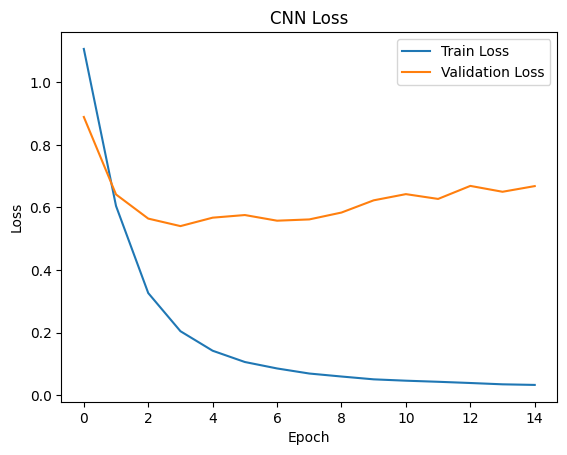

In [16]:
plot_results(cnn_results, "CNN Loss", "Loss")

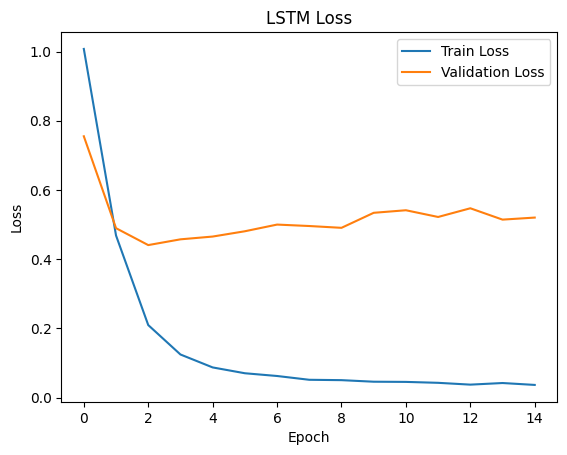

In [17]:
plot_results(lstm_results, "LSTM Loss", "Loss")

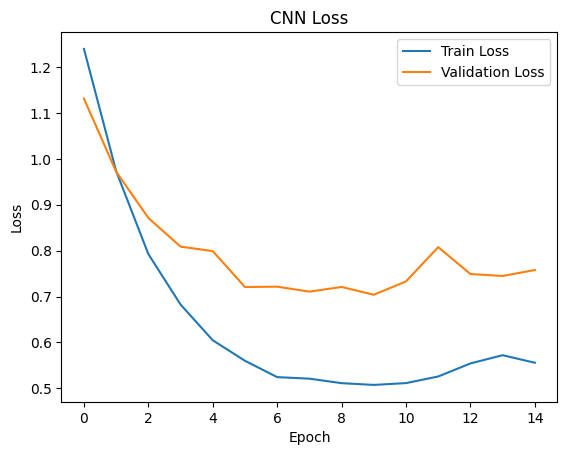

In [18]:
plot_results(rnn_results, "CNN Loss", "Loss")

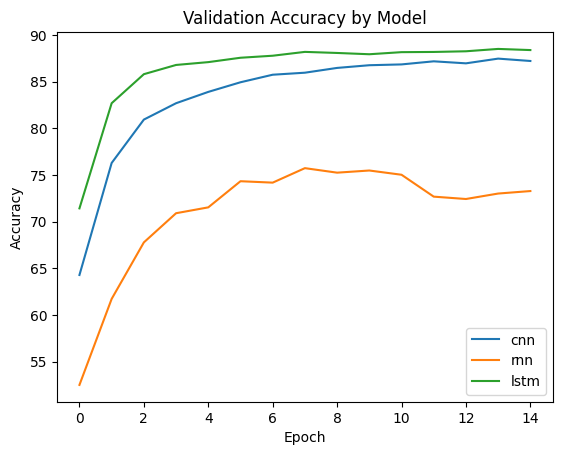

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

xdata = cnn_results["Epoch"]
ydata1 = cnn_results[f"Validation Accuracy"]
ydata2 = rnn_results[f"Validation Accuracy"]
ydata3 = lstm_results[f"Validation Accuracy"]

ax.plot(xdata, ydata1, color='tab:blue', label = f"cnn")
ax.plot(xdata, ydata2, color='tab:orange', label = f"rnn")
ax.plot(xdata, ydata3, color='tab:green', label = f"lstm")
ax.set_title("Validation Accuracy by Model")
ax.set(xlabel = "Epoch", ylabel = "Accuracy")
ax.legend()

# Twitter Sentiment Analysis - Pytorch

## Description
This repository contains the implementation of deep learning sentiment analysis models using CNN, RNN and LSTM model architecture.  

Training and testing data consists of a collection of tweets sourced from the following [kaggle data repository](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data), with the following classification categories:

- Negative : 0
- Positive : 1 
- Neutral : 2
- Irrelevant : 3

Data was pre-processed and tokenized using [nltk](https://www.nltk.org/)'s TweetTokenizer.

## Results

The following figure details the validation accuracy of each model on the dataset:  

![Validation Results](results/validation_accuracy.png)

The following table details the model accuracy on the testing dataset for the best-performing model of each architecture:

|       RNN        |        CNN       |       LSTM       |
|------------------|------------------|------------------|
|     0.83913      |     0.94156      |      0.9272      |

## Requirements
(Substitute pytorch for the latest stable CPU build if GPU is not avaiable)

- python = 3.10.9
- nltk = 3.8.1 
- pytorch = 2.1.2+cu118
- cuda = 11.6
- gensim = 4.3.2

## Usage

To use the repository, first clone the repository. Then, see the `main.ipnyb` file to see examples of training, testing, and predicting using the model